In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bz2 #para trabajar con el archivo comprimido en python
import time 

path_bookings='bookings.csv.bz2'
path_bookings_sample='bookings.sample.csv.bz2'
path_bookings_clean='bookings.clean.csv.bz2'
path_bookings_reduced_clean='bookings_reduced_clean.csv.bz2'
path_searches='searches.csv.bz2'
path_searches_sample='searches.sample.csv.bz2'
path_searches_clean='searches_clean.csv.bz2'

### Exercise 1  
Count the number of lines in Python for each file.

In [2]:
! ls -lt 

total 1093064
-rw------- 1 bea bea    255505 nov 29 14:37 reto_Amadeus.ipynb
-rw------- 1 bea bea   9086639 nov 26 23:30 searches_bookings.csv.bz2
-rw------- 1 bea bea   1239132 nov 26 23:24 bookings_reduced_clean.csv.bz2
-rw------- 1 bea bea     13306 nov 26 20:40 prueba.csv.bz2
-rw------- 1 bea bea     49426 nov 26 20:40 pruebas.ipynb
-rw------- 1 bea bea        65 nov 26 20:40 README.md
-rw------- 1 bea bea   1824927 nov 26 20:40 searches.sample.csv
-rw------- 1 bea bea  53792629 nov 26 20:40 bookings.clean.csv.bz2
-rw------- 1 bea bea   9055452 nov 26 20:40 searches_clean.csv.bz2
-rw------- 1 bea bea 554970628 nov 26 20:40 bookings.csv.bz2
-rw------- 1 bea bea      1257 nov 26 20:39 03_out_plot.png
-rw------- 1 bea bea   4232732 nov 26 20:39 bookings.sample.csv
-rw------- 1 bea bea 483188920 nov 26 20:39 searches.csv.bz2
-rw------- 1 bea bea       103 nov 26 20:39 02.out.csv
-rw------- 1 bea bea    535893 nov 26 20:39 bookings.sample.csv.bz2
-rw------- 1 bea bea    244720 nov 26 20

In [3]:
# Extrae 100000 lineas para crear un archivo csv de muestra:

! bzcat bookings.csv.bz2 | head -n 10000 > bookings.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = bookings.csv.bz2, output file = (stdout)


In [4]:
# comprime el archivo sample en formato bz2: 

! bzip2  bookings.sample.csv 

bzip2: Output file bookings.sample.csv.bz2 already exists.


In [5]:
! ls -lt

total 1093064
-rw------- 1 bea bea   4232732 nov 29 14:37 bookings.sample.csv
-rw------- 1 bea bea    255505 nov 29 14:37 reto_Amadeus.ipynb
-rw------- 1 bea bea   9086639 nov 26 23:30 searches_bookings.csv.bz2
-rw------- 1 bea bea   1239132 nov 26 23:24 bookings_reduced_clean.csv.bz2
-rw------- 1 bea bea     13306 nov 26 20:40 prueba.csv.bz2
-rw------- 1 bea bea     49426 nov 26 20:40 pruebas.ipynb
-rw------- 1 bea bea        65 nov 26 20:40 README.md
-rw------- 1 bea bea   1824927 nov 26 20:40 searches.sample.csv
-rw------- 1 bea bea  53792629 nov 26 20:40 bookings.clean.csv.bz2
-rw------- 1 bea bea   9055452 nov 26 20:40 searches_clean.csv.bz2
-rw------- 1 bea bea 554970628 nov 26 20:40 bookings.csv.bz2
-rw------- 1 bea bea      1257 nov 26 20:39 03_out_plot.png
-rw------- 1 bea bea 483188920 nov 26 20:39 searches.csv.bz2
-rw------- 1 bea bea       103 nov 26 20:39 02.out.csv
-rw------- 1 bea bea    535893 nov 26 20:39 bookings.sample.csv.bz2
-rw------- 1 bea bea    244720 nov 26 20

In [6]:
! bzcat bookings.csv.bz2 | head -3

act_date           ^source^pos_ctry^pos_iata^pos_oid  ^rloc          ^cre_date           ^duration^distance^dep_port^dep_city^dep_ctry^arr_port^arr_city^arr_ctry^lst_port^lst_city^lst_ctry^brd_port^brd_city^brd_ctry^off_port^off_city^off_ctry^mkt_port^mkt_city^mkt_ctry^intl^route          ^carrier^bkg_class^cab_class^brd_time           ^off_time           ^pax^year^month^oid      
2013-03-05 00:00:00^1A    ^DE      ^a68dd7ae953c8acfb187a1af2dcbe123^1a11ae49fcbf545fd2afc1a24d88d2b7^ea65900e72d71f4626378e2ebd298267^2013-02-22 00:00:00^1708^0^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHR     ^LON     ^GB      ^ZRH     ^ZRH     ^CH      ^LHRZRH  ^LONZRH  ^CHGB    ^1^LHRZRH         ^VI^T        ^Y        ^2013-03-07 08:50:00^2013-03-07 11:33:37^-1^2013^3^NULL     
2013-03-26 00:00:00^1A    ^US      ^e612b9eeeee6f17f42d9b0d3b79e75ca^7437560d8f276d6d05eeb806d9e7edee^737295a86982c941f1c2da9a46a14043^2013-03-26 00:00:00^135270^0^SAL     ^SAL     ^SV      ^

###### Exercise 1:  
Pruebas con archivo de muestra.

In [7]:
# Forma no recomendada de acceder al archivo comprimido. 
# Requiere cerrar el archivo más tarde (o produce error si se ejecuta de nuevo).

fileBz2=bz2.BZ2File(path_bookings_sample)

In [8]:
fileBz2.close

<bound method BZ2File.close of <bz2.BZ2File object at 0x7f61906ab438>>

In [9]:
# Forma recomendada para acceder al archivo comprimido. El archivo queda cerrado en la misma instrucción.
# Prueba: contar líneas con el archivo de muestra.

with bz2.BZ2File(path_bookings_sample) as fileBz2:
    counter=0
    for line in fileBz2: counter=counter+1
print (counter)

10000


#### Exercise 1_1: Número de líneas en bookings.csv.bz2 (con Python)

In [10]:
t_0=time.process_time() # Inicio del proceso

with bz2.BZ2File(path_bookings) as fileBz2:
    counter=0
    for line in fileBz2: counter=counter+1
num_lineas_booking=counter

tempus=time.process_time()-t_0 # Tiempo de proceso

print (f'tiempo de proceso: {tempus}')
print (f'número de líneas en {path_bookings}: {num_lineas_booking}')

tiempo de proceso: 125.968300989
número de líneas en bookings.csv.bz2: 10000011


#### Exercise 1_2: Número de líneas en searches.csv.bz2 (con Python)

In [11]:
t_0=time.process_time() 

with bz2.BZ2File(path_searches) as fileBz2:
    counter=0
    for line in fileBz2: counter=counter+1
num_lineas_searches=counter

tempus=time.process_time()-t_0 

print (f'tiempo de proceso: {tempus}')
print (f'número de líneas en {path_searches}: {num_lineas_searches}')

tiempo de proceso: 138.265839265
número de líneas en searches.csv.bz2: 20390199


#### Exercise 1_1: Número de líneas en bookings.csv.bz2 (con Pandas)

In [12]:
# Pruebas con sample. Crea iterable descomprimiendo fragmento a fragmento:

reader=pd.read_csv(path_bookings_sample,compression='bz2',\
                  sep='^',iterator=True,chunksize=1000)

In [13]:
# Pruebas con sample. Cuenta filas de dataframe de muestra:

t_0=time.process_time()

nrows=0
for df in reader: nrows=nrows+len(df)
    
tempus=time.process_time()-t_0

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en {path_bookings_sample}: {nrows}')

tiempo de proceso: 0.2238350700000069
número de filas en bookings.sample.csv.bz2: 9999


In [14]:
# Filas de dataframe bookings:

t_0=time.process_time()

Big_reader=pd.read_csv(path_bookings,compression='bz2',\
                  sep='^',iterator=True,chunksize=10000)
nrows=0
for df in Big_reader: nrows=nrows+len(df)

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en {path_bookings}: {nrows}')

tiempo de proceso: 0.2238350700000069
número de filas en bookings.csv.bz2: 10000010


#### Exercise 1_2: Número de líneas en searches.csv.bz2 (con Pandas)

In [15]:
# Filas del dataframe searches:

t_0=time.process_time()

Big_reader_2=pd.read_csv(path_searches,compression='bz2',\
                  sep='^',iterator=True,chunksize=10000)
nrows=0
for df in Big_reader_2: 
    nrows=nrows+len(df)

tempus=time.process_time()-t_0

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en {path_searches}: {nrows}')

tiempo de proceso: 203.26825320499995
número de filas en searches.csv.bz2: 20390198


## Exercise 2  
Top 10 arrival airports in the world in 2013 (using the bookings file).  
- Arrival airport is the column arr_port. It is the IATA code for the airport.  
- To get the total number of passengers for an airport, you can sum the column pax, grouping by arr_port. Note that there is negative pax. That corresponds to cancelations. So to get the total number of passengers that have actually booked, you should sum including the negatives (that will remove the canceled bookings).  
- Print the top 10 arrival airports in the standard output, including the number of passengers.  
- Bonus point: Get the name of the city or airport corresponding to that airport (programatically, we suggest to have a look at GeoBases in Github).  
- Bonus point: Solve this problem using pandas (instead of any other approach).

###### Inspección rápida de sample de bookings: 

In [16]:
df_bo_sample=pd.read_csv(path_bookings_sample,delimiter='^')

In [17]:
df_bo_sample.shape

(9999, 38)

In [18]:
df_bo_sample.head()

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [19]:
df_bo_sample.columns

Index(['act_date           ', 'source', 'pos_ctry', 'pos_iata', 'pos_oid  ',
       'rloc          ', 'cre_date           ', 'duration', 'distance',
       'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry',
       'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry',
       'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry',
       'intl', 'route          ', 'carrier', 'bkg_class', 'cab_class',
       'brd_time           ', 'off_time           ', 'pax', 'year', 'month',
       'oid      '],
      dtype='object')

In [20]:
# Para evitar contar espacios en blanco, referencia a columnas por posición:

df_bo_sample.columns[5]

'rloc          '

In [21]:
# Valores únicos de columna rloc en bookings.sample:

df_bo_sample[df_bo_sample.columns[5]].nunique()

3638

###### Exercise2  
Pruebas con csv de muestra. Ajustes para homogeneizar registros antes de eliminar duplicados.   

In [22]:
# Arreglos en títulos de columnas:

for col in df_bo_sample.columns: 
    df_bo_sample=df_bo_sample.rename(columns={col:col.strip()})
print (df_bo_sample.columns)

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'duration', 'distance', 'dep_port', 'dep_city', 'dep_ctry',
       'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry',
       'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry',
       'mkt_port', 'mkt_city', 'mkt_ctry', 'intl', 'route', 'carrier',
       'bkg_class', 'cab_class', 'brd_time', 'off_time', 'pax', 'year',
       'month', 'oid'],
      dtype='object')


In [23]:
# Para identificar columnas no numéricas:

print (df_bo_sample.dtypes)
print (f'{len(df_bo_sample.columns)} columnas')

act_date     object
source       object
pos_ctry     object
pos_iata     object
pos_oid      object
rloc         object
cre_date     object
duration      int64
distance      int64
dep_port     object
dep_city     object
dep_ctry     object
arr_port     object
arr_city     object
arr_ctry     object
lst_port     object
lst_city     object
lst_ctry     object
brd_port     object
brd_city     object
brd_ctry     object
off_port     object
off_city     object
off_ctry     object
mkt_port     object
mkt_city     object
mkt_ctry     object
intl          int64
route        object
carrier      object
bkg_class    object
cab_class    object
brd_time     object
off_time     object
pax           int64
year          int64
month         int64
oid          object
dtype: object
38 columnas


In [24]:
# Lista de columnas de tipo object: 

obj_cols=df_bo_sample.columns[df_bo_sample.dtypes==object]
print (obj_cols)
print (f'{len (obj_cols)} columnas tipo object')

Index(['act_date', 'source', 'pos_ctry', 'pos_iata', 'pos_oid', 'rloc',
       'cre_date', 'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city',
       'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city',
       'brd_ctry', 'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city',
       'mkt_ctry', 'route', 'carrier', 'bkg_class', 'cab_class', 'brd_time',
       'off_time', 'oid'],
      dtype='object')
32 columnas tipo object


In [25]:
# Fila 3 como referencia para identificar columnas en mayúsculas (tiene registros en todas las col. no númericas).

df_bo_sample[obj_cols].iloc[3]

act_date                  2013-03-26 00:00:00
source                                 1A    
pos_ctry                             AU      
pos_iata     0f984b3bb6bd06661c95529bbd6193bc
pos_oid      36472c6dbaf7afec9136ac40364e2794
rloc         5ecf00fdcbcec761c43dc7285253d0c1
cre_date                  2013-03-26 00:00:00
dep_port                             AKL     
dep_city                             AKL     
dep_ctry                             NZ      
arr_port                             SVO     
arr_city                             MOW     
arr_ctry                             RU      
lst_port                             AKL     
lst_city                             AKL     
lst_ctry                             NZ      
brd_port                             AKL     
brd_city                             AKL     
brd_ctry                             NZ      
off_port                             SVO     
off_city                             MOW     
off_ctry                          

In [26]:
# Lista de columnas con registros que deben estar escritos en mayúsculas:

uppercase_cols=list()
for col in obj_cols: 
    if df_bo_sample[col].iloc[3]==df_bo_sample[col].iloc[3].upper():
        uppercase_cols.append(col)
print (uppercase_cols)

['act_date', 'source', 'pos_ctry', 'cre_date', 'dep_port', 'dep_city', 'dep_ctry', 'arr_port', 'arr_city', 'arr_ctry', 'lst_port', 'lst_city', 'lst_ctry', 'brd_port', 'brd_city', 'brd_ctry', 'off_port', 'off_city', 'off_ctry', 'mkt_port', 'mkt_city', 'mkt_ctry', 'route', 'carrier', 'bkg_class', 'cab_class', 'brd_time', 'off_time', 'oid']


In [27]:
# Para homogenizar registros en columnas no numéricas: 

for col in obj_cols: 
    df_bo_sample[col]=df_bo_sample[col].str.strip() # Quitar blancos delante y detŕas 
for col in uppercase_cols: 
    df_bo_sample[col]=df_bo_sample[col].str.upper() # Corrige posibles minúsculas indebidas
df_bo_sample.head()


,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NULL
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NULL
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NULL
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [28]:
# Eliminar filas duplicadas y seleccionar columnas relevantes:

df_bo_sample_rdz=df_bo_sample.drop_duplicates()[['arr_port','pax']]
print (f'{len(df_bo_sample_rdz)} filas no duplicadas en {path_bookings_sample}')

9999 filas no duplicadas en bookings.sample.csv.bz2


###### Exercise 2   
Top 10 aeropuertos por pasajeros en sample como **benchmark** para comprobación posterior.

In [29]:
top10_bmark=df_bo_sample_rdz.groupby('arr_port').sum().sort_values(by='pax',ascending=False)[:10]
top10_bmark

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


###### Exercise 2   
Top 10 aeropuertos por pasajeros en sample leyendo con iterable chunk a chunk:

In [30]:
# Prueba con sample usando iterable: 
# Ensayo para eliminar duplicados.

t_0 = time.process_time()

small_chk=100
reader=pd.read_csv(path_bookings_sample,compression='bz2',\
                  sep='^',iterator=True,chunksize=small_chk)
df_aux_0=pd.DataFrame()
last_recorded_len=0
for i, df in enumerate(reader):
    for col in df.columns: 
        df=df.rename(columns={col:col.strip()}) # Edita títulos de columna
    for col in obj_cols: # Lista de cols. no numéricas
        df[col]=df[col].str.strip() # Elimina blancos delante y detrás en cols. no numéricas
    for col in uppercase_cols: # Lista de cols. que deben ser en mayúsculas
        df[col]=df[col].str.upper() # Corrige posibles minúsculas indebidas    
    df_aux_1=df_aux_0.append(df) # Añade df editado 
    df_aux_2=df_aux_1.drop_duplicates()
    if (i+1)%50==0:
        print(f'{i+1} chunks de {small_chk} filas; {len(df_aux_2)-last_recorded_len} filas nuevas')
        last_recorded_len=len(df_aux_2) # Último registro de filas en df_aux 
    df_aux_0=df_aux_2
    #if (i+1)==150: break # Sanity check for tests 

df_bo_smpl_clean=df_aux_0.copy()

tempus = time.process_time() - t_0  

print (f'tiempo de proceso: {tempus}')
print (f'número de filas distintas en {path_bookings_sample}: {len(df_bo_smpl_clean)}')

50 chunks de 100 filas; 5000 filas nuevas
100 chunks de 100 filas; 4999 filas nuevas
tiempo de proceso: 7.297894650999979
número de filas distintas en bookings.sample.csv.bz2: 9999


In [31]:
# Top10 aeropuertos por pasajeros en csv de muestra leída con iterable:

relevant_cols=['arr_port','pax']
df_bo_smpl_rdzd=df_bo_smpl_clean[relevant_cols]
top10_sample=df_bo_smpl_rdzd.groupby('arr_port').sum().sort_values(by='pax',ascending=False)[:10]
top10_sample

,pax
arr_port,
HKG,112
LGA,95
ORD,94
JFK,92
LAX,91
SFO,91
MCO,90
DCA,82
DEN,79


In [32]:
# Comprobación: Comparación del resultado con el benchmark (requiere prescindir de índices)

top10_bmark.reset_index(drop=True).equals(top10_sample.reset_index(drop=True))

True

###### Exercise 2   
Top 10 aeropuertos por pasajeros en booking.csv.bz2. 

In [33]:
# Intento de eliminar duplicados (requiere recursos para trabajar con el df sin duplicados completo).

t_0 = time.process_time()

huge_chk=100000
reader=pd.read_csv(path_bookings,compression='bz2',\
                  sep='^',iterator=True,chunksize=huge_chk,dtype='unicode')
df_aux_0=pd.DataFrame()
last_recorded_len=0
for i, df in enumerate(reader):
    for col in df.columns: 
        df=df.rename(columns={col:col.strip()}) # Edita títulos de columna
    for col in obj_cols: # Lista de columnas no numéricas
        df[col]=df[col].str.strip() # Elimina blancos delante y detrás en cols. no numéricas
    for col in uppercase_cols: # Lista de columnas que deben ser en mayúsculas
        df[col]=df[col].str.upper() # Corrige posibles minúsculas indebidas    
    df_aux_1=df_aux_0.append(df) # Añade df editado 
    df_aux_2=df_aux_1.drop_duplicates()
    if (i+1)%10==0:
        print(f'{i+1} chunks de {huge_chk} filas; {len(df_aux_2)-last_recorded_len} filas nuevas')
        last_recorded_len=len(df_aux_2) # Último registro de filas en df_aux 
    df_aux_0=df_aux_2
    #if (i+1)==150: break # Sanity check for tests 

df_bo_clean=df_aux_0.copy()

tempus = time.process_time() - t_0  

print (f'tiempo de proceso: {tempus}')
print (f'número de filas distintas en {path_bookings}: {len(df_bo_clean)}')

10 chunks de 100000 filas; 1000000 filas nuevas
20 chunks de 100000 filas; 0 filas nuevas
30 chunks de 100000 filas; 0 filas nuevas
40 chunks de 100000 filas; 0 filas nuevas
50 chunks de 100000 filas; 0 filas nuevas
60 chunks de 100000 filas; 3 filas nuevas
70 chunks de 100000 filas; 0 filas nuevas
80 chunks de 100000 filas; 0 filas nuevas
90 chunks de 100000 filas; 0 filas nuevas
100 chunks de 100000 filas; 0 filas nuevas
tiempo de proceso: 809.065112657
número de filas distintas en bookings.csv.bz2: 1000003


In [34]:
df_bo_clean.to_csv('bookings.clean.csv.bz2',sep='^',compression='bz2',index=False)
# path to bookings.clean.csv.bz2 en primera celda

In [35]:
# Inspección/comprobación: 
 
reader=pd.read_csv(path_bookings_clean,compression='bz2',\
                  sep='^',iterator=True,chunksize=small_chk)
for df in reader: 
    df_check=df
    break
print (df_check.shape)
df_check.head()

(100, 38)


,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,...,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,...,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NaN
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NaN
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,...,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NaN
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,...,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


###### Aclaración:   
El procedimiento empleado para eliminar duplicados funciona porque hay muchos: el dataset que se va construyendo chunk a chunk con las filas no duplicadas es manejable con los recursos del equipo. El proceso requiere operar con todo el dataframe que se va construyendo porque es la referencia para identificar nuevos duplicados en cada nuevo chunk y añadir solo las filas no repetidas.   
Si el número de duplicados fuera menor y todos los chunk aportaran un buen número de filas originales, el dataframe se haría inmanejable para la cpu con unos pocos chunks.   
Por este motivo entiendo que el método de trabajo no es válido para datasets grandes con pocos duplicados. Es más correcto diseñar un proceso que permita eliminar duplicados también cuando son pocos y el dataframe sin duplicados sigue siendo inmanejable con un pc doméstico.  
En el ejercicio 3 se propone un **procedimiento alternativo para eliminar duplicados** que funciona incluso cuando el dataframe sin duplicados sigue siendo muy grande para trabajar con él completo. 

In [36]:
# Dataframe reducido (columnas relevantes) agrupadas por aeropuertos: 
# Sigo trajando con iterable como ejercicio, aunque el dataframe sin duplicados ya no lo requiere.

t_0=time.process_time()

relevant_cols=['arr_port','pax']
reader=pd.read_csv(path_bookings_clean,compression='bz2',\
                  sep='^',iterator=True,chunksize=huge_chk,\
                  usecols=relevant_cols)
df_aux_0=pd.DataFrame()
for i, df in enumerate(reader):
    df_aux_1=df.groupby('arr_port').sum() # Agrupación chunk a chunk
    df_aux_0=df_aux_0.append(df_aux_1)
    if (i+1)%10==0: print (f'{i+1} chunks de {huge_chk} filas añadidos')
    #if (i+1)==51: break # Sanity check for tests
df_bookings_PaxPerAirport=df_aux_0.copy()

tempus=time.process_time()-t_0

print (f'tiempo de proceso: {tempus}')
print (f'número de filas en df_bookings_PaxPerAirport: {len(df_bookings_PaxPerAirport)}')

10 chunks de 100000 filas añadidos
tiempo de proceso: 10.363267583999914
número de filas en df_bookings_PaxPerAirport: 15334


#### Exercise 2: Top 10 de aeropuertos de destino por pasajeros

In [37]:
n_for_top_list=10
# (Nueva agrupación sobre el df con los chunks reunidos)
top_bookings=df_bookings_PaxPerAirport.groupby('arr_port').sum()\
            .sort_values(by='pax',ascending=False)[:n_for_top_list]
top_bookings['pax']=top_bookings['pax'].astype('int')
top_bookings

,pax
arr_port,
LHR,8881
MCO,7093
LAX,7053
LAS,6963
JFK,6627
CDG,6449
BKK,5946
MIA,5815
SFO,5800


In [38]:
top_bookings.to_csv('02.out.csv',sep='^')

In [39]:
# Inspección/comprobación: 

df=pd.read_csv('02.out.csv',sep='^')
df.head(10)

,arr_port,pax
0,LHR,8881
1,MCO,7093
2,LAX,7053
3,LAS,6963
4,JFK,6627
5,CDG,6449
6,BKK,5946
7,MIA,5815
8,SFO,5800
9,DXB,5559


## Exercise 3
Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona  
- For the arriving airport, you can use the Destination column in the searches file.  
- Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.  
- Bonus point: Solving this problem using pandas (instead of any other approach)

In [40]:
# Sample file para searches: 

! bzcat searches.csv.bz2 | head -n 10000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = searches.csv.bz2, output file = (stdout)


In [41]:
! bzip2  searches.sample.csv 

bzip2: Output file searches.sample.csv.bz2 already exists.


In [42]:
! ls -lt

total 1092900
-rw------- 1 bea bea   1824927 nov 29 15:02 searches.sample.csv
-rw------- 1 bea bea       103 nov 29 15:02 02.out.csv
-rw------- 1 bea bea  53792629 nov 29 15:02 bookings.clean.csv.bz2
-rw------- 1 bea bea     87587 nov 29 15:01 reto_Amadeus.ipynb
-rw------- 1 bea bea   4232732 nov 29 14:37 bookings.sample.csv
-rw------- 1 bea bea   9086639 nov 26 23:30 searches_bookings.csv.bz2
-rw------- 1 bea bea   1239132 nov 26 23:24 bookings_reduced_clean.csv.bz2
-rw------- 1 bea bea     13306 nov 26 20:40 prueba.csv.bz2
-rw------- 1 bea bea     49426 nov 26 20:40 pruebas.ipynb
-rw------- 1 bea bea        65 nov 26 20:40 README.md
-rw------- 1 bea bea   9055452 nov 26 20:40 searches_clean.csv.bz2
-rw------- 1 bea bea 554970628 nov 26 20:40 bookings.csv.bz2
-rw------- 1 bea bea      1257 nov 26 20:39 03_out_plot.png
-rw------- 1 bea bea 483188920 nov 26 20:39 searches.csv.bz2
-rw------- 1 bea bea    535893 nov 26 20:39 bookings.sample.csv.bz2
-rw------- 1 bea bea    244720 nov 26 20

In [43]:
# Inspección de archivo searches de muestra: 
# Path a muestra de searches en primera celda. 

df_se_sample=pd.read_csv(path_searches_sample,compression='bz2',sep='^')

In [44]:
df_se_sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [45]:
df_se_sample.shape

(9999, 45)

In [46]:
df_se_sample.columns.sort_values()

Index(['Country', 'Date', 'Destination', 'From', 'InternetOffice',
       'IsFromInternet', 'IsFromVista', 'IsPublishedForNeg', 'NbSegments',
       'OfficeID', 'Origin', 'RoundTrip', 'Seg1Arrival', 'Seg1BookingCode',
       'Seg1Carrier', 'Seg1Date', 'Seg1Departure', 'Seg2Arrival',
       'Seg2BookingCode', 'Seg2Carrier', 'Seg2Date', 'Seg2Departure',
       'Seg3Arrival', 'Seg3BookingCode', 'Seg3Carrier', 'Seg3Date',
       'Seg3Departure', 'Seg4Arrival', 'Seg4BookingCode', 'Seg4Carrier',
       'Seg4Date', 'Seg4Departure', 'Seg5Arrival', 'Seg5BookingCode',
       'Seg5Carrier', 'Seg5Date', 'Seg5Departure', 'Seg6Arrival',
       'Seg6BookingCode', 'Seg6Carrier', 'Seg6Date', 'Seg6Departure',
       'TerminalID', 'Time', 'TxnCode'],
      dtype='object')

In [47]:
print (f'{len(df_se_sample.columns)} columnas en searches')
df_se_sample.dtypes

45 columnas en searches


Date                 object
Time                 object
TxnCode              object
OfficeID             object
Country              object
Origin               object
Destination          object
RoundTrip             int64
NbSegments            int64
Seg1Departure        object
Seg1Arrival          object
Seg1Date             object
Seg1Carrier          object
Seg1BookingCode      object
Seg2Departure        object
Seg2Arrival          object
Seg2Date             object
Seg2Carrier          object
Seg2BookingCode      object
Seg3Departure        object
Seg3Arrival          object
Seg3Date             object
Seg3Carrier          object
Seg3BookingCode      object
Seg4Departure        object
Seg4Arrival          object
Seg4Date             object
Seg4Carrier          object
Seg4BookingCode      object
Seg5Departure        object
Seg5Arrival          object
Seg5Date             object
Seg5Carrier          object
Seg5BookingCode      object
Seg6Departure        object
Seg6Arrival         

In [48]:
# Columnas no numéricas en searches: 

se_obj_cols=df_se_sample.columns[df_se_sample.dtypes=='object']
print (f'{len(se_obj_cols)} columnas no numéricas en searches')
se_obj_cols

40 columnas no numéricas en searches


Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'Seg1Departure', 'Seg1Arrival', 'Seg1Date',
       'Seg1Carrier', 'Seg1BookingCode', 'Seg2Departure', 'Seg2Arrival',
       'Seg2Date', 'Seg2Carrier', 'Seg2BookingCode', 'Seg3Departure',
       'Seg3Arrival', 'Seg3Date', 'Seg3Carrier', 'Seg3BookingCode',
       'Seg4Departure', 'Seg4Arrival', 'Seg4Date', 'Seg4Carrier',
       'Seg4BookingCode', 'Seg5Departure', 'Seg5Arrival', 'Seg5Date',
       'Seg5Carrier', 'Seg5BookingCode', 'Seg6Departure', 'Seg6Arrival',
       'Seg6Date', 'Seg6Carrier', 'Seg6BookingCode', 'From', 'TerminalID',
       'InternetOffice'],
      dtype='object')

In [49]:
# Para identificar cols. que deben estar en mayúsculas: 

for col in se_obj_cols: 
    print (col, df_se_sample[col].unique()[-1]) # Sirve como referencia de valores no nan en cada campo

Date 2013-01-10
Time 15:32:04
TxnCode AIC
OfficeID e0ca92b506fbf482891d34ccebad0f32
Country VN
Origin IVC
Destination BFN
Seg1Departure IVC
Seg1Arrival BFN
Seg1Date 2013-10-27
Seg1Carrier YW
Seg1BookingCode X
Seg2Departure VLI
Seg2Arrival QXG
Seg2Date 2014-01-06
Seg2Carrier NM
Seg2BookingCode I
Seg3Departure OER
Seg3Arrival WDH
Seg3Date 2013-06-27
Seg3Carrier NM
Seg3BookingCode I
Seg4Departure WDH
Seg4Arrival GOT
Seg4Date 2013-06-27
Seg4Carrier VK
Seg4BookingCode I
Seg5Departure BOM
Seg5Arrival HYD
Seg5Date 2013-10-17
Seg5Carrier 4H
Seg5BookingCode D
Seg6Departure MIA
Seg6Arrival HAM
Seg6Date 2013-07-05
Seg6Carrier EU
Seg6BookingCode V
From AZ0FQ
TerminalID 7c676d48c11dae25a2c3e99bfbd42639
InternetOffice CCS


In [50]:
# Lista de cols. de searches que deben estar en mayúsculas: 

se_uppercase_cols=[]
for col in se_obj_cols:
    if df_se_sample[col].unique()[-1]==df_se_sample[col].unique()[-1].upper(): 
        se_uppercase_cols.append(col)
print (f'{len(se_uppercase_cols)} columnas en mayúsculas en searches')
se_uppercase_cols

38 columnas en mayúsculas en searches


['Date',
 'Time',
 'TxnCode',
 'Country',
 'Origin',
 'Destination',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'InternetOffice']

###### Procedimiento alternativo para eliminar duplicados:  
Ensayo de un procedimiento alternativo para eliminar duplicados sin mantener el df completo como referencia para identificar filas repetidas.  
En la **primera etapa** se eliminan duplicados en cada chunk y se guardan los df resultantes -e independientes- con el nombre dfc1, dfc2,... Se recuperan con globals( ) \['dfci'\] para cada valor numérico de i o con globals( ) \['dfc'+str(i)\] para iterar sobre i.  

In [51]:
# Primera etapa: ajusta la edición y elimina duplicados en cada chunk, y crea un dataframe dfc para cada uno. 
# Prueba con sample: 

t_0=time.process_time()

z=0
while True:
    try: 
        del globals()['dfc'+str(z)] # Asegura que no se cuelan dfc de pruebas
        z=z+1
    except: break
print ('dfc reseteados')

smll_chk=100
reader=pd.read_csv(path_searches_sample,compression='bz2',\
                   sep='^',iterator=True, chunksize=smll_chk)
df_aux_0=pd.DataFrame()
len_df_se_smpl_clean_0=0
for i, df in enumerate(reader):
    for col in se_obj_cols: 
        df[col]=df[col].astype(str).str.strip() # Corrección astype para esquivar traceback
    for col in se_uppercase_cols:
        df[col]=df[col].str.upper()
    dfc=df.drop_duplicates() # Elimina duplicados en cada chunk
    len_df_se_smpl_clean_0+=len(dfc)
    globals()['dfc'+str(i)]=dfc
    if (i+1)%10==0: print (f'{i+1} dfc creados')
    #if (i+1)==30: break # Sanity check for tests
n_dfc=i+1 # Número de dataframes dfc creados     
    
tempus=time.process_time()-t_0

print (f'Tiempo de proceso: {tempus}')
print (f'Número de filas tras primer drop_duplicates: {len_df_se_smpl_clean_0}')
print (f'Numero de dataframes dfc: {n_dfc}')

dfc reseteados
10 dfc creados
20 dfc creados
30 dfc creados
40 dfc creados
50 dfc creados
60 dfc creados
70 dfc creados
80 dfc creados
90 dfc creados
100 dfc creados
Tiempo de proceso: 4.6978937189999215
Número de filas tras primer drop_duplicates: 9999
Numero de dataframes dfc: 100


In [52]:
# Inspección/comprobación: 

globals()['dfc0'].head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NAN,NAN,NAN,NAN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [53]:
# Inspección/comprobación: 

rnd=np.random.randint(n_dfc)
print (f'Posicion dfc aleatoria: {rnd}')
globals()['dfc'+str(rnd)].head()

Posicion dfc aleatoria: 14


,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
1400,2013-01-02,02:15:09,MPC,440642a9bdaeb6287f826cefd73255e8,US,ICN,ORD,0,1,ICN,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
1401,2013-01-02,18:29:33,MPT,9789d17ec2629741f00ca74dda3a42d6,SE,STO,ROM,1,2,STO,...,NAN,NAN,NAN,NAN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
1402,2013-01-02,06:29:14,MPT,e49bfb83b6d9e429dbe748303f69e308,US,ORD,HKG,1,2,ORD,...,NAN,NAN,NAN,NAN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,IAD
1403,2013-01-02,00:04:09,MTP,e08742a93e1d3d9e679723625a3484fc,DE,PRG,KBP,0,1,PRG,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1404,2013-01-02,16:00:14,FQD,71d7e235af48506bc12149d78ffd6a34,US,BOS,LIS,1,2,BOS,...,NAN,NAN,NAN,NAN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,SAN


###### Procedimiento alternativo para eliminar duplicados:  
En la **segunda etapa** se compara cada dfc -ya editado y sin duplicados- con cada uno de los siguientes construyendo, en cada ciclo del bucle, un dataframe formado solo por dos dfc y eliminado aquí los duplicados: si hay alguno, se elimina la fila duplicada en el segundo dfc (la opción keep por defecto de drop_duplicates es 'first').  
A continuación se reconstruye el primer dfc -el usado como referencia, que no resulta afectado en este bucle- recuperando las filas que aportó al dataframe conjunto o doble (dfc_dbl).  El segundo dfc se reconstruye asignándole resto de filas del dataframe conjunto: son las que había aportado excepto las que ya estaban en el primer dfc.  
El proceso hace esto para cada dfc, comparando cada uno con todos los que le siguen. De ese modo, todos son comparados, dos a dos, con todos los demás. En cada ciclo principal -índice i- tomamos un dfc como referencia y nos aseguramos de que ninguno de los siguientes dfc (-índice j) contiene lineas que ya están en el de referencia. 

In [54]:
# Segunda etapa eliminación duplicados. Prueba con sample: 

t_0=time.process_time()

T_rows=0
for i in range(n_dfc): 
    for j in range(i+1,n_dfc): # Para comparar cada dfc con cada uno de los siguientes 
        len_dfci=len(globals()['dfc'+str(i)]) # len del dfc de referencia: no cambia con drop_duplicates
        dfc_dbl=pd.DataFrame() # Dataframe auxiliar: guarda dfc dos a dos para eliminar duplicados del segundo
        dfc_dbl=globals()['dfc'+str(i)].append(globals()['dfc'+str(j)]).drop_duplicates()
        globals()['dfc'+str(i)]=dfc_dbl.iloc[:len_dfci] # Recupera las filas correspondientes al dfc de referencia
        globals()['dfc'+str(j)]=dfc_dbl.iloc[len_dfci:] # Recupera las filas no duplicadas del segundo dfc
    T_rows=T_rows+len_dfci
    if (i+1)%10==0:
        print (f'Total filas hasta {i+1}-ésimo dfc: {T_rows}')
    #if (i+1)==30:break # Sanity check for tests
        
tempus=time.process_time()-t_0

print (f'Tiempo de proceso: {tempus}')

Total filas hasta 10-ésimo dfc: 1000
Total filas hasta 20-ésimo dfc: 2000
Total filas hasta 30-ésimo dfc: 3000
Total filas hasta 40-ésimo dfc: 4000
Total filas hasta 50-ésimo dfc: 5000
Total filas hasta 60-ésimo dfc: 6000
Total filas hasta 70-ésimo dfc: 7000
Total filas hasta 80-ésimo dfc: 8000
Total filas hasta 90-ésimo dfc: 9000
Total filas hasta 100-ésimo dfc: 10000
Tiempo de proceso: 46.48984200399991


In [55]:
# Inspección/comprobación: 

len_dfc_sample_sum=0
for i in range (n_dfc):
    len_dfc_sample_sum+=len (globals()['dfc'+str(i)])
len_dfc_sample_sum

9999

In [56]:
# Inspección/comprobación: 

rnd=np.random.randint(n_dfc)
print (f'Posicion dfc aleatoria: {rnd}')
globals()['dfc'+str(rnd)].head()

Posicion dfc aleatoria: 70


,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
7000,2013-01-08,18:25:45,MPT,e198f381ded8956d7571df875eb640e6,GB,LGW,RAK,1,2,LGW,...,NAN,NAN,NAN,NAN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BHX
7001,2013-01-08,01:40:36,MPT,0f3f393096afab89ffc5a728018f8f64,GR,ROM,OPO,0,1,ROM,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,ATH
7002,2013-01-08,08:04:48,MPT,440642a9bdaeb6287f826cefd73255e8,US,IST,IAD,0,1,IST,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HPN
7003,2013-01-08,01:18:08,MPT,1aed5e3e24c27e27a9863fa275517643,US,ORD,CMH,1,2,ORD,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,LAX
7004,2013-01-08,18:19:59,MPT,715773658985f59706880801440e0678,FI,HEL,MIL,1,2,HEL,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,HEL


###### Eliminación de duplicados en searches.csv.bz2:

In [57]:
# Primera etapa:

t_0=time.process_time()

z=0
while True:
    try: 
        del globals()['dfc'+str(z)] # Asegura que no se cuelan dfc de pruebas
        z=z+1
    except: break
print ('dfc reseteados')

huge_chk=100000
reader=pd.read_csv(path_searches,compression='bz2',sep='^',\
                   iterator=True, chunksize=huge_chk, dtype='unicode')
df_aux_0=pd.DataFrame()
len_df_se_clean_0=0
for i, df in enumerate(reader):
    for col in se_obj_cols: 
        df[col]=df[col].astype(str).str.strip() # Corrección astype para esquivar traceback
    for col in se_uppercase_cols:
        df[col]=df[col].str.upper()
    dfc=df.drop_duplicates() # Elimina duplicados en cada chunk
    len_df_se_clean_0+=len(dfc)
    globals()['dfc'+str(i)]=dfc
    if (i+1)%10==0: print (f'{i+1} dfc creados')
    #if (i+1)==30: break # Sanity check for tests
n_dfc=i+1 # Número de dataframes dfc creados     
    
tempus=time.process_time()-t_0

print (f'Tiempo de proceso: {tempus}')
print (f'Número de filas tras primer drop_duplicates: {len_df_se_clean_0}')
print (f'Numero de dataframes dfc: {n_dfc}')

dfc reseteados
10 dfc creados
20 dfc creados
30 dfc creados
40 dfc creados
50 dfc creados
60 dfc creados
70 dfc creados
80 dfc creados
90 dfc creados
100 dfc creados
110 dfc creados
120 dfc creados
130 dfc creados
140 dfc creados
150 dfc creados
160 dfc creados
170 dfc creados
180 dfc creados
190 dfc creados
200 dfc creados
Tiempo de proceso: 813.205283994
Número de filas tras primer drop_duplicates: 20389899
Numero de dataframes dfc: 204


In [58]:
# Segunda etapa: 

t_0=time.process_time()

T_rows=0
for i in range(n_dfc): 
    for j in range(i+1,n_dfc): # Para comparar cada dfc con cada uno de los siguientes 
        len_dfci=len(globals()['dfc'+str(i)]) # len del dfc de referencia: no cambia con drop_duplicates
        dfc_dbl=pd.DataFrame() # Dataframe auxiliar: guarda dfc dos a dos para eliminar duplicados del segundo
        dfc_dbl=globals()['dfc'+str(i)].append(globals()['dfc'+str(j)]).drop_duplicates()
        globals()['dfc'+str(i)]=dfc_dbl.iloc[:len_dfci] # Recupera las filas correspondientes al dfc de referencia
        globals()['dfc'+str(j)]=dfc_dbl.iloc[len_dfci:] # Recupera las filas no duplicadas del segundo dfc
    T_rows=T_rows+len_dfci
    if (i+1)%100==0:
        print (f'Total filas hasta {i+1}-ésimo dfc: {T_rows}')
    #if (i+1)==3:break # Sanity check for tests
        
tempus=time.process_time()-t_0

print (f'Tiempo de proceso: {tempus}')

Total filas hasta 100-ésimo dfc: 359003
Total filas hasta 200-ésimo dfc: 359003
Tiempo de proceso: 646.3840313790001


In [59]:
# Inspección/comprobación: 

len_dfc_sum=0
for i in range (n_dfc):
    len_dfc_sum+=len (globals()['dfc'+str(i)])
len_dfc_sum

359004

In [60]:
# Inspección/comprobación: 

globals()['dfc'+str(3)].head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
300000,2013-10-28,05:05:32,FXP,4f6b7f4267cad29ec28b81b255fed079,ID,CGK,PLM,0,1,CGK,...,NAN,NAN,NAN,NAN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
300001,2013-10-28,23:45:08,MPT,bec61f55c64b17158ab8f074602fe0ca,US,PSP,CLT,1,2,PSP,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
300002,2013-10-28,20:13:24,MPT,ef4ffc1e49c33c07f6e5c97ffa93e07e,UA,LED,VIE,1,2,LED,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
300003,2013-10-28,16:10:59,MPT,b2f919c3d6a9ba67140ad215791fb7a1,RU,MOW,VCE,0,1,MOW,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0
300004,2013-10-28,22:27:06,MPT,e5b2bcab3bb7cc4b29a698e2f40ec244,US,ORD,CTG,1,2,ORD,...,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,0


In [61]:
# Inspección/comprobación: 

globals()['dfc'+str(4)].head() # Primer dfc que no aporta filas nuevas (todas sus lineas estaban duplicadas)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice


In [62]:
# Para guardar el dataframe searches limpio y completo como csv.bz2:

globals()['dfc0'].to_csv('searches_clean.csv.bz2',compression='bz2',\
                         sep='^',index=False)
for i in range(1,n_dfc):
    globals()['dfc'+str(i)].to_csv('searches_clean.csv.bz2',compression='bz2',\
                                   sep='^',index=False,mode='a',header=False)

In [63]:
# Inspección/comprobación:
# Path para searches_clean en primera celda.

reader=pd.read_csv(path_searches_clean,compression='bz2',iterator=True,\
                   sep='^',chunksize=huge_chk,dtype='unicode')
len_dfc_T=0
for i, df in enumerate(reader):
    len_dfc_T+=len(df)
len_dfc_T

359004

In [64]:
# Para reconstruir el dataframe searches solo con las filas y columnas relevantes para el ejercicio 3:
# Path para searches_clean en primera celda.

t_0=time.process_time()

rlvnt_cols=['Date','Destination']
rlvnt_rows=['AGP','MAD','BCN'] # Aeropuertos de destino relevantes

reader=pd.read_csv(path_searches_clean,compression='bz2',iterator=True,\
                   sep='^',chunksize=huge_chk,usecols=rlvnt_cols)
df_se_cln_rdz=pd.DataFrame()
for i, df in enumerate(reader):
    df_mini=df[df['Destination'].isin(rlvnt_rows)]
    df_se_cln_rdz=df_se_cln_rdz.append(df_mini)
    print (f'Filas añadidas hasta {i+1}-ésimo chunk: {len(df_se_cln_rdz)}')

tempus=time.process_time()-t_0
print (f'Tiempo de proceso: {tempus}')

Filas añadidas hasta 1-ésimo chunk: 3663
Filas añadidas hasta 2-ésimo chunk: 7283
Filas añadidas hasta 3-ésimo chunk: 10348
Filas añadidas hasta 4-ésimo chunk: 11899
Tiempo de proceso: 2.9811277610001525


In [65]:
# Ajustes para tratar las fechas: 

df_se_cln_rdz['Year']=df_se_cln_rdz['Date'].str.split('-').str[0]
df_se_cln_rdz['Month']=df_se_cln_rdz['Date'].str.split('-').str[1]
df_se_cln_rdz.head()

,Date,Destination,Year,Month
4,2013-01-01,MAD,2013,01
93,2013-01-01,AGP,2013,01
113,2013-01-01,BCN,2013,01
147,2013-01-01,AGP,2013,01
151,2013-01-01,MAD,2013,01


In [66]:
# Inspección: 

print (df_se_cln_rdz['Year'].unique())
print (df_se_cln_rdz['Month'].unique())

['2013']
['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12']


In [67]:
# Pivot table de búsquedas de vuelos por meses: 

PT_searches=df_se_cln_rdz.pivot_table(index=['Year','Month'],columns='Destination',\
                                      values='Date',aggfunc='count')
PT_searches.head(12)

Destination  AGP  BCN  MAD
Year Month                
2013 01      169  517  425
     02      147  497  400
     03      187  536  433
     04      145  548  443
     05      190  504  462
     06      139  465  400
     07      156  513  403
     08      138  475  383
     09      143  411  371
     10      115  359  395
     11      114  354  362
     12       66  275  259

###### Exercise 3 : Plot de búsquedas de vuelos a BCN, MAD y AGP en searches.csv.bz2 

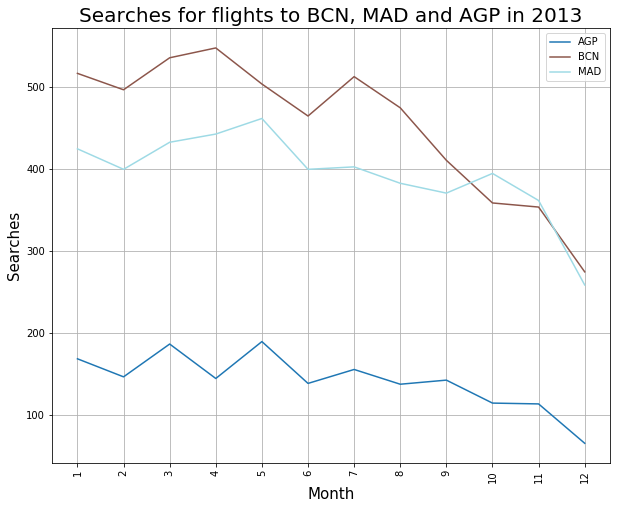

In [68]:
PT_searches.plot(figsize=(10,8),cmap='tab20')
plt.title('Searches for flights to BCN, MAD and AGP in 2013',fontsize=20)
plt.grid(True)
plt.legend(loc='best',fontsize='medium',frameon=True)
plt.ylabel('Searches',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.xticks(np.arange(12),np.arange(1,13,1),rotation='vertical')
plt.show()
plt.savefig('03_out_plot')

## Exercise 4    
Match searches with bookings  
- For every search in the searches file, find out whether the search ended up in a booking or not (using the info in the bookings file). For instance, search and booking origin and destination should match.  
- For the bookings file, origin and destination are the columns dep_port and arr_port, respectively.  
- Generate a CSV file with the search data, and an additional field, containing 1 if the search ended up in a booking, and 0 otherwise.  

In [77]:
#import the_beatles as fab4 # traceback intencionado para parar la ejecución automática del notebook

ModuleNotFoundError: No module named 'the_beatles'

In [78]:
# Para mostrar todas las columnas 

pd.options.display.max_columns = None 

In [79]:
# Como ejercicio, sigo usando el read_csv iterable a pesar de que los dataset sin duplicados ya son manejables. 
# Inspección:

huge_chk=100000
bo_reader=pd.read_csv(path_bookings_clean,compression='bz2',iterator=True,\
                     sep='^',chunksize=huge_chk)
for df in bo_reader: 
    df_bo_check=df # un df de muestra
    break
df_bo_check.head()    

,act_date,source,pos_ctry,pos_iata,pos_oid,rloc,cre_date,duration,distance,dep_port,dep_city,dep_ctry,arr_port,arr_city,arr_ctry,lst_port,lst_city,lst_ctry,brd_port,brd_city,brd_ctry,off_port,off_city,off_ctry,mkt_port,mkt_city,mkt_ctry,intl,route,carrier,bkg_class,cab_class,brd_time,off_time,pax,year,month,oid
0,2013-03-05 00:00:00,1A,DE,a68dd7ae953c8acfb187a1af2dcbe123,1a11ae49fcbf545fd2afc1a24d88d2b7,ea65900e72d71f4626378e2ebd298267,2013-02-22 00:00:00,1708,0,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHR,LON,GB,ZRH,ZRH,CH,LHRZRH,LONZRH,CHGB,1,LHRZRH,VI,T,Y,2013-03-07 08:50:00,2013-03-07 11:33:37,-1,2013,3,NaN
1,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,SAL,SAL,SV,CLT,CLT,US,CLTSAL,CLTSAL,SVUS,1,SALATLCLT,NV,L,Y,2013-04-12 13:04:00,2013-04-12 22:05:40,1,2013,3,NaN
2,2013-03-26 00:00:00,1A,US,e612b9eeeee6f17f42d9b0d3b79e75ca,7437560d8f276d6d05eeb806d9e7edee,737295a86982c941f1c2da9a46a14043,2013-03-26 00:00:00,135270,0,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLT,CLT,US,SAL,SAL,SV,CLTSAL,CLTSAL,SVUS,1,CLTATLSAL,NV,U,Y,2013-07-15 07:00:00,2013-07-15 11:34:51,1,2013,3,NaN
3,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKL,AKL,NZ,SVO,MOW,RU,AKLSVO,AKLMOW,NZRU,1,AKLHKGSVO,XK,G,Y,2013-04-24 23:59:00,2013-04-25 16:06:31,1,2013,3,SYDA82546
4,2013-03-26 00:00:00,1A,AU,0f984b3bb6bd06661c95529bbd6193bc,36472c6dbaf7afec9136ac40364e2794,5ecf00fdcbcec761c43dc7285253d0c1,2013-03-26 00:00:00,30885,0,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,SVO,MOW,RU,AKL,AKL,NZ,AKLSVO,AKLMOW,NZRU,1,SVOHKGAKL,XK,G,Y,2013-05-14 20:15:00,2013-05-16 10:44:50,1,2013,3,SYDA82546


In [80]:
# Inspección:

se_reader=pd.read_csv(path_searches_clean,compression='bz2',iterator=True,\
                     sep='^',chunksize=huge_chk)
for df in se_reader: 
    df_se_check=df # un df de muestra
    break
df_se_check.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NAN,AUH,TXL,2013-02-02,D2,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NAN,NAN,SFO,ICT,2013-08-09,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,ARN,2013-01-02,DU,W,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,MAD,2013-03-22,NAN,NAN,MAD,OSL,2013-03-31,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


## Ejercicio 4: primer intento

Uso las siguientes columnas para casar los dataframes:  
- En bookings:  
    1. Fecha: 'cre_date' (deje editarse la fecha para que los formatos coincidan)    
    2. Aeropuerto de origen: 'dep_port'  
    3. Aeropuerto de destino: 'arr_port'  
- En searches:  
    1. Fecha: 'Date'  
    2. Aeropuerto de origen: 'Origin'  
    3. Aeropuerto de destino: 'Destination'  

Parto de los csv.bz2 editados y eliminados los duplicados globales, por que no es necesario hacerlo de nuevo. 

### Plan de trabajo (Fases):
1. Dataframe reducido de bookings solo con las columnas relevantes, sin duplicados respecto al los campos seleccionados. Cambia nombres de columna que intervienen en el merge para evitar que este cree columnas nuevas no deseadas. Edita el formato de fecha para que sea adecuado para el merge. Añade columna nueva 'Booked' con valor 1 que identificará las filas del merge en las que se produjo coincidencia.   
2. Añade columna 'Booked' en searches con valor 0 para facilitar el merge. Merge de los dataframes searches y el bookings reducido con los campos relevantes -tienen el mismo nombre en los dos dataframes-. Ajusta las dos columnas denominadas Booked resultante del merge para unificarlas en una con valor 1 o 0 según haya habido coincidencia o no. 

### Fase 1:  
Dataframe reducido de bookings solo con las columnas relevantes, sin duplicados respecto al los campos seleccionados. Esta fase tiene dos etapas. 
Cambia nombres de columna que intervienen en el merge para evitar que este cree columnas nuevas no deseadas.  
Edita el formato de fecha para que sea adecuado para el merge.   
Añade columna nueva 'Booked' con valor 1 que identificará las filas del merge en las que se produjo coincidencia. 

In [87]:
# Sigo simulando que los archivos son demasiado grandes para trabajar con ellos completos. 

# Reducción de bookings a las columnas relevantes, edición y eliminación de duplicados internos:

t_0=time.process_time()

z=0
while True:
    try: 
        del globals()['df_bo_rdzd'+str(z)] # Asegura que no se cuelan variables de pruebas
        z=z+1
    except: break
print ('df_bo_rdzd reseteados')

# Primera etapa eliminación duplicados: df reducidos y sin duplicados internos

mrg_cols_bo=['cre_date','dep_port','arr_port']

bo_reader=pd.read_csv(path_bookings_clean, compression='bz2', iterator=True,\
                     sep='^', chunksize=huge_chk, usecols=mrg_cols_bo)
for i, df_bo in enumerate(bo_reader):
    df_bo['Booked']=1 # Permitirá identificar las filas que producen coincidencia en el merge
    df_bo['cre_date']=df_bo['cre_date'].str[:10] # Sección relevante de la fecha
    df_bo=df_bo.rename(columns={'cre_date':'Date','dep_port':'Origin','arr_port':'Destination'})
    globals()['df_bo_rdzd'+str(i)]=df_bo.drop_duplicates() # en cada chunk indep, para las vbles relevantes
    if (i+1)%5==0: 
        print (f'{i+1} df reducidos creados hasta el momento')
        
n_bo_rdzd=i+1 # núm. de df reducidos de bookings creados        
tempus=time.process_time()-t_0
print (f'Tiempo de proceso: {tempus}')
print (f'{n_bo_rdzd} df reducidos creados')

df_bo_rdzd reseteados
5 df reducidos creados hasta el momento
10 df reducidos creados hasta el momento
Tiempo de proceso: 10.986042487999839
11 df reducidos creados


In [88]:
# Inspeccion/comprobación:

globals()['df_bo_rdzd0'].head()

,Date,Origin,Destination,Booked
0,2013-02-22,ZRH,LHR,1
1,2013-03-26,SAL,CLT,1
3,2013-03-26,AKL,SVO,1
5,2013-03-20,DEN,LGA,1
7,2013-03-25,NRT,SIN,1


In [90]:
# Sigo simulando que los archivos son demasiado grandes para trabajar con ellos completos. 

# Segunda etapa eliminación duplicados: elimina duplicados globales en df_bo_rdzd.

len_df_bo_rdzd_sum=0
for i in range(n_bo_rdzd): # Ciclo principal: El df de referencia en cada ciclo (índice i) no cambia
    len_bo_rdzd_i=len(globals()['df_bo_rdzd'+str(i)])
    len_df_bo_rdzd_sum+=len_bo_rdzd_i
    if i==0: 
        globals()['df_bo_rdzd'+str(i)].to_csv('bookings_reduced_clean.csv.bz2',compression='bz2',sep='^',\
                                        index=False) # Crea o sobreescribe archivo csv con el primer df_bo_rdzd
    else: 
        globals()['df_bo_rdzd'+str(i)].to_csv('bookings_reduced_clean.csv.bz2',compression='bz2',sep='^',\
                    index=False,mode='a',header=False) # Añade al csv los siguientes df_bo_rdzd sin duplicados
    for j in range (i+1,n_bo_rdzd): # Ciclo secundario: elimina duplicados en dataframes de índice j
        df_aux=pd.DataFrame() 
        df_aux=globals()['df_bo_rdzd'+str(i)].append(globals()['df_bo_rdzd'+str(j)]).drop_duplicates()
        # mv df_aux['cre_date']=df_aux['cre_date'].str[:10] # Sección relevante de la fecha
        globals()['df_bo_rdzd'+str(i)]=df_aux.iloc[:len_bo_rdzd_i] # No se ha modificado en el ciclo de índice j
        globals()['df_bo_rdzd'+str(j)]=df_aux.iloc[len_bo_rdzd_i:] # Filas no duplicadas en df de índice j
    if (i+1)%5==0: 
        print (f'{i+1} df revisados hasta el momento')
print (f'{len_df_bo_rdzd_sum} filas no duplicadas')

5 df revisados hasta el momento
10 df revisados hasta el momento
334876 filas no duplicadas


In [91]:
# Inspección/comprobación: 
# Path_bookings_reduced_clean en primera celda

smll_chk=1000
check_reader=pd.read_csv(path_bookings_reduced_clean, compression='bz2', iterator=True,\
                         sep='^', chunksize=smll_chk)
for df in check_reader:
    df_check=df # un df de muestra
    break
df_check.head()

,Date,Origin,Destination,Booked
0,2013-02-22,ZRH,LHR,1
1,2013-03-26,SAL,CLT,1
2,2013-03-26,AKL,SVO,1
3,2013-03-20,DEN,LGA,1
4,2013-03-25,NRT,SIN,1


### Fase 2:  

Merge de los dataframes searches y el bookings reducido con las claves relevantes en cada uno.  

Sigo trabajando con el iterable como ejercicio.  

Antes de hacer el merge chunk a chunk se crea una columna 'Booked' de valor 0 en searches. Tras el merge se corrige para que tome valor 1 en las filas en las que hubo coincidencia. 

Para hacer el merge chunk a chunk se toma, en cada ciclo principal -índice i-, un chunk de searches que se designa como globals( )\['df_se_bo'+str(i)\]. Este se casa (merge), en el segundo ciclo -de índice j-, con todos los chunks de bookings, cada uno de los cuales aporta las coincidencias que se encuentren. Los merges se hacen por la izquierda, por lo que las filas de bookings que no se emparejan se descartan a efectos de este ciclo. El proceso se repite para cada chunk de searches. Los dataframes resultantes del merge se reunen en un archivo csv.        

No es necesario eliminar duplicados porque no debe haberlos, ya que tampoco los hay en los dataframes que participan en el merge y se emplean todas las columnas no triviales de bookings como claves para el emparejamiento -la columna 'Booked' de bookings tiene un valor único-. Sí puede ocurrir que una fila de bookings case con más de una fila de searches, es decir, que una reserva se asigne a varias búsquedas. 

#### Observación:   

El procedimiento puede sobreestimar la proporción de búsqudas que resultan en una reserva.   

Por un lado, se eliminan los duplicados en bookings respecto a las variables usadas en el merge. Solo se conserva un representante de las reservas para cada día, origen y destino.   

Por otro lado, cuando una reserva casa con alguna búsqueda, todas las búsquedas de esa fecha, origen y destino quedan registradas como 'Booked'. Es decir, basta una reserva en una fecha, origen y destino para marcar como reservadas todas las busquedas con el mismo valor en esos campos. Esto hace que el número de búsquedas que terminan en reserva pueda estar sobreestimado.   

Es más correcto buscar un **procedimiento alternativo** que tenga en cuenta el número de reservas para cada fecha, origen y destino. Ese debe ser el número máximo de búsquedas que queden registradas como reservadas de todas las realizadas ese día, con esos origen y destino. 

In [129]:
# Sigo simulando que los archivos son demasiado grandes para trabajar con ellos completos.

z=0
while True:
    try: 
        del globals()['df_se_bo'+str(z)] # Asegura que no interfieren variables de pruebas
        z=z+1
    except: break
print ('df_se_bo reseteados')

mrg_cols_se=['Date','Origin','Destination']

se_reader=pd.read_csv(path_searches_clean, compression='bz2', iterator=True,\
                     sep='^', chunksize=huge_chk, dtype='unicode')

len_df_se_bo_sum=0
for i, df_se in enumerate(se_reader): # Ciclo principal
    df_se['Booked']=0
    globals()['df_se_bo'+str(i)]=df_se
    print (f'Ciclo principal {i+1}-ésimo:')
    # Creamos un iterable para cada ciclo secundario (el iterable se agota cada vez que se recorre completo):
    bo_rdzd_reader=pd.read_csv(path_bookings_reduced_clean, compression='bz2', iterator=True,\
                    chunksize=huge_chk, sep='^', dtype='unicode')
    for j, df_bo in enumerate(bo_rdzd_reader): # Ciclo secundario 
        globals()['df_se_bo'+str(i)]=globals()['df_se_bo'+str(i)]\
                        .merge(df_bo, how='left',on=mrg_cols_se, suffixes=(None,'_aux'))
        print (f'Valores únicos en {j+1}-ésimo \'Booked\':',globals()['df_se_bo'+str(i)]['Booked'].unique())
        print (f'Valores únicos en {j+1}-ésimo \'Booked_aux\':',globals()['df_se_bo'+str(i)]['Booked_aux'].unique())
        # Para reunir las dos columnas 'Booked':
        globals()['df_se_bo'+str(i)]['Booked']=globals()['df_se_bo'+str(i)]['Booked']\
                            +globals()['df_se_bo'+str(i)]['Booked_aux'].fillna(0).astype('int')    
        del globals()['df_se_bo'+str(i)]['Booked_aux']
    len_df_se_bo_i=len(globals()['df_se_bo'+str(i)])
    len_df_se_bo_sum+=len_df_se_bo_i
    if i==0:
        globals()['df_se_bo'+str(i)].to_csv('04_out.csv.bz2',compression='bz2',sep='^',\
                                        index=False) # Crea o sobreescribe archivo csv con el primer df_se_bo
    else: 
        globals()['df_se_bo'+str(i)].to_csv('04_out.csv.bz2',compression='bz2',sep='^',\
                    index=False,mode='a',header=False) # Añade al csv los siguientes df_se_bo
    print (f'{len_df_se_bo_sum} filas hasta el momento')

df_se_bo reseteados
Ciclo principal 1-ésimo:
Valores únicos en 1-ésimo 'Booked': [0]
Valores únicos en 1-ésimo 'Booked_aux': [nan '1']
Valores únicos en 2-ésimo 'Booked': [0 1]
Valores únicos en 2-ésimo 'Booked_aux': [nan '1']
Valores únicos en 3-ésimo 'Booked': [0 1]
Valores únicos en 3-ésimo 'Booked_aux': [nan '1']
Valores únicos en 4-ésimo 'Booked': [0 1]
Valores únicos en 4-ésimo 'Booked_aux': [nan '1']
100000 filas hasta el momento
Ciclo principal 2-ésimo:
Valores únicos en 1-ésimo 'Booked': [0]
Valores únicos en 1-ésimo 'Booked_aux': [nan '1']
Valores únicos en 2-ésimo 'Booked': [0 1]
Valores únicos en 2-ésimo 'Booked_aux': [nan '1']
Valores únicos en 3-ésimo 'Booked': [0 1]
Valores únicos en 3-ésimo 'Booked_aux': [nan '1']
Valores únicos en 4-ésimo 'Booked': [0 1]
Valores únicos en 4-ésimo 'Booked_aux': [nan '1']
200000 filas hasta el momento
Ciclo principal 3-ésimo:
Valores únicos en 1-ésimo 'Booked': [0]
Valores únicos en 1-ésimo 'Booked_aux': [nan]
Valores únicos en 2-ésimo '

In [130]:
# Extraído con iterador como ejercicio. Reducido y tratado como dataframe único.
# Inspección: 

se_bo_reader=pd.read_csv('04_out.csv.bz2', compression='bz2', iterator=True,\
                        chunksize=huge_chk, sep='^', dtype='unicode',usecols=['Date','Origin','Destination','Booked'])
df_se_bo_rdzd=pd.DataFrame()
for df in se_bo_reader:
    df_se_bo_rdzd=df_se_bo_rdzd.copy().append(df) # dataframe reducido (col. relevantes) para inspección
df_se_bo_rdzd.head()

,Date,Origin,Destination,Booked
0,2013-01-01,TXL,AUH,0
1,2013-01-01,ATH,MIL,0
2,2013-01-01,ICT,SFO,0
3,2013-01-01,RNB,ARN,0
4,2013-01-01,OSL,MAD,0


In [131]:
df_se_bo_rdzd.columns

Index(['Date', 'Origin', 'Destination', 'Booked'], dtype='object')

In [132]:
df_se_bo_rdzd['Booked'].unique()

array(['0', '1'], dtype=object)

In [133]:
df_se_bo_rdzd[df_se_bo_rdzd['Booked']=='1']

,Date,Origin,Destination,Booked
27,2013-01-01,RUH,JED,1
40,2013-01-01,DMM,MNL,1
59,2013-01-01,ATL,MIA,1
134,2013-01-01,MEL,SYD,1
172,2013-01-01,BOM,JED,1
...,...,...,...,...
357762,2013-12-24,LHR,SFO,1
357829,2013-12-24,MED,RUH,1
357917,2013-12-24,SEA,SGN,1
358077,2013-12-25,SAH,CAI,1


In [134]:
marit=df_se_bo_rdzd['Booked'].astype('int').mean()
print (f'La proporción de búsquedas que resultan en reservas es: {marit}')

La proporción de búsquedas que resultan en reservas es: 0.0355929181847556


##  Ejercicio 4: procedimiento alternativo    

El procedimiento anterior (primer intento) sobreestima la proporción de búsquedas que producen reservas (explicado como observación a la descripción de la fase 2 del proceso anterior). Esto se debe a que se eliminaron los duplicados en el dataframe de bookings reducido a las columnas relevantes y se casaron las reservas con todas las búsquedas con las que coinciden en fecha, origen y destino.  

Para corregir este efecto, resuelvo de nuevo **contando, ordenando y numerando los duplicados** en lugar de eliminándolos. El proceso básico se estructura en cuatro fases, que se ilustran a continuación con un dataframe "de juguete", artificial y muy sencillo, empleado para diseñar el método y comprobar que su funcionamiento es correcto. 

El siguente paso será adaptar este proceso básico para que pueda ser aplicado sin acceder a los dataframes completos, esto es, leyendo los archivos searches y bookings limpios de duplicados con un iterable, chunk a chunk. Esta dificultad adicional la añado como ejercicio, por coherencia con el planteamiento de los ejercicios anteriores. 


#### Plan de trabajo básico (Fases):     

1. Reducir bookings a las columnas relevantes, **ordenar** de acuerdo con ellas y **contar reservas** (es decir, contar duplicados) para cada fecha, origen y destino con groupby. Numerar con rank las reservas para cada fecha, origen y destino. Requiere columnas auxiliares.  
2. **Ordenar** searches por fecha, origen y destino y **contar búsquedas** -duplicados en estos campos- con groupby. Numerar con rank las búsquedas para cada fecha, origen y destino. Requiere columnas auxiliares.     
3. **Merge** de searches y bookings por la izquierda con fecha, origen, destino y **posición** en cada uno de los rankings **como claves**. Para cada fecha, origen y destino, solo casan búsqueda y reserva que ocupen la misma posición en sus respectivos rankings: si hay más búsquedas que reservas, las últimas búsquedas no casarán (no encuentran reserva con su misma posición en el ranking) y aparecen desparejadas en el merge (por ser por la izquierda), y si hay más reservas que búsquedas, las últimas reservas no casarán y no entran en el merge (de nuevo, por ser por la izquierda). 
4. Construir la columna 'Booked' a partir de las auxiliares y prescindir de ellas. 

In [275]:
# Ilustración del procedimiento básico: dataframe de juguete para contar y numerar duplicados en bookings

# 'A' representa claves para merge con searches, 'B' es 1 para todas las filas 

df_toybo=pd.DataFrame({'A':list('acbcabbaa'),'B':[1,1,1,1,1,1,1,1,1]})
df_toybo.sort_values(by='A',inplace=True) # Facilita comprobaciones
df_toybo

,A,B
0,a,1
4,a,1
7,a,1
8,a,1
2,b,1
5,b,1
6,b,1
1,c,1
3,c,1


In [277]:
# Ilustración del procedimiento básico.

# Cuenta duplicados en campos relevantes (facilita comprobaciones)

df_aux=df_toybo.groupby('A',as_index=False).sum()
df_aux.rename(columns={'B':'Bookings'},inplace=True)
df_aux

,A,Bookings
0,a,4
1,b,3
2,c,2


In [278]:
# Ilustración del procedimiento básico.

# Incorpora la cuenta de duplicados al df: 

df_toybo=df_toybo.merge(df_aux,on='A',how='left')
df_toybo

,A,B,Bookings
0,a,1,4
1,a,1,4
2,a,1,4
3,a,1,4
4,b,1,3
5,b,1,3
6,b,1,3
7,c,1,2
8,c,1,2


In [279]:
# Ilustración del procedimiento básico.

# Crea 'B_index': antiguo índice (ordenada), servirá para evitar empates al numerar ocurrencias (reservas) para cada valor de 'A'

df_toybo.reset_index(inplace=True)
df_toybo.rename(columns={'index':'B_index'},inplace=True)
df_toybo

,B_index,A,B,Bookings
0,0,a,1,4
1,1,a,1,4
2,2,a,1,4
3,3,a,1,4
4,4,b,1,3
5,5,b,1,3
6,6,b,1,3
7,7,c,1,2
8,8,c,1,2


In [280]:
# Ilustración del procedimiento básico.

# El groupby transforma 'B_index' en un ranking de ocurrencias (reservas) para cada valor de 'A' (columnas relevantes para merge)

df_aux=df_toybo[['A','B_index']].groupby(['A']).rank() 
df_aux.rename (columns={'B_index':'B_rank'},inplace=True)
df_aux

,B_rank
0,1.0
1,2.0
2,3.0
3,4.0
4,1.0
5,2.0
6,3.0
7,1.0
8,2.0


In [281]:
# Ilustración del procedimiento básico.

# Incorpora ranking de bookings al df.

df_toybo=pd.concat([df_toybo,df_aux],axis=1)
df_toybo

,B_index,A,B,Bookings,B_rank
0,0,a,1,4,1.0
1,1,a,1,4,2.0
2,2,a,1,4,3.0
3,3,a,1,4,4.0
4,4,b,1,3,1.0
5,5,b,1,3,2.0
6,6,b,1,3,3.0
7,7,c,1,2,1.0
8,8,c,1,2,2.0


In [282]:
# Ilustración del procedimiento básico.

# Prescindimos de algunas columnas auxiliares. 

del df_toybo['B_index']
del df_toybo['Bookings']
df_toybo

,A,B,B_rank
0,a,1,1.0
1,a,1,2.0
2,a,1,3.0
3,a,1,4.0
4,b,1,1.0
5,b,1,2.0
6,b,1,3.0
7,c,1,1.0
8,c,1,2.0


In [283]:
# Ilustración del procedimiento básico: dataframe de juguete para contar y numerar duplicados en searches. 

# 'A' representa claves para merge, 'C' son resto de cols , 'S' es 0 para todas las filas.

df_toyse=pd.DataFrame({'A':list('abacdabaa'),'C':list('zxssxzzxz'),'S':[0,0,0,0,0,0,0,0,0]})
df_toyse.sort_values(by='A',inplace=True) # Facilita comprobaciones 
df_toyse

,A,C,S
0,a,z,0
2,a,s,0
5,a,z,0
7,a,x,0
8,a,z,0
1,b,x,0
6,b,z,0
3,c,s,0
4,d,x,0


In [284]:
# Ilustración del procedimiento básico.

# Cuenta duplicados en campos relevantes.

df_aux=df_toyse[['A','S']].groupby('A',as_index=False).count()
df_aux.rename(columns={'S':'Searches'},inplace=True)
df_aux

,A,Searches
0,a,5
1,b,2
2,c,1
3,d,1


In [285]:
# Ilustración del procedimiento básico.

# Incorpora la cuenta de duplicados al df (facilita comprobaciones) 

df_toyse=df_toyse.merge(df_aux,on='A',how='left')
df_toyse

,A,C,S,Searches
0,a,z,0,5
1,a,s,0,5
2,a,z,0,5
3,a,x,0,5
4,a,z,0,5
5,b,x,0,2
6,b,z,0,2
7,c,s,0,1
8,d,x,0,1


In [286]:
# Ilustración del procedimiento básico.

# Crea 'S_index': antiguo índice (ordenada), servirá para evitar empates al numerar ocurrencias (búsquedas) para cada valor de 'A'

df_toyse.reset_index(inplace=True)
df_toyse.rename(columns={'index':'S_index'},inplace=True)
df_toyse

,S_index,A,C,S,Searches
0,0,a,z,0,5
1,1,a,s,0,5
2,2,a,z,0,5
3,3,a,x,0,5
4,4,a,z,0,5
5,5,b,x,0,2
6,6,b,z,0,2
7,7,c,s,0,1
8,8,d,x,0,1


In [287]:
# Ilustración del procedimiento básico.

# El groupby transforma 'S_index' en un ranking de ocurrencias (búsquedas) para cada valor de 'A' (columnas relevantes para merge)

df_aux=df_toyse[['A','S_index']].groupby(['A']).rank() 
df_aux.rename (columns={'S_index':'S_rank'},inplace=True)
df_aux

,S_rank
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,1.0
6,2.0
7,1.0
8,1.0


In [288]:
# Ilustración del procedimiento básico.

# Incorpora el ranking al df.

df_toyse=pd.concat([df_toyse,df_aux],axis=1)
df_toyse

,S_index,A,C,S,Searches,S_rank
0,0,a,z,0,5,1.0
1,1,a,s,0,5,2.0
2,2,a,z,0,5,3.0
3,3,a,x,0,5,4.0
4,4,a,z,0,5,5.0
5,5,b,x,0,2,1.0
6,6,b,z,0,2,2.0
7,7,c,s,0,1,1.0
8,8,d,x,0,1,1.0


In [289]:
# Ilustración del procedimiento básico.

# Prescindimos de algunas columnas auxiliares.

del df_toyse['S_index']
del df_toyse['Searches']
df_toyse

,A,C,S,S_rank
0,a,z,0,1.0
1,a,s,0,2.0
2,a,z,0,3.0
3,a,x,0,4.0
4,a,z,0,5.0
5,b,x,0,1.0
6,b,z,0,2.0
7,c,s,0,1.0
8,d,x,0,1.0


In [291]:
# Ilustración del procedimiento básico.

# Merge: solo casan las filas que coinciden en 'A' y en posicion (rank) en bookings y searches
# La 5ª búsqueda 'a' no aparece reservada. Tampoco la búsqueda 'd.' 
# La 3ª reserva 'b' y la segunda 'c' no han casado con ninguna búsqueda. 

df_toysebo=df_toyse.merge(df_toybo,how='left',left_on=['A','S_rank'],right_on=['A','B_rank'])
df_toysebo

,A,C,S,S_rank,B,B_rank
0,a,z,0,1.0,1.0,1.0
1,a,s,0,2.0,1.0,2.0
2,a,z,0,3.0,1.0,3.0
3,a,x,0,4.0,1.0,4.0
4,a,z,0,5.0,NaN,NaN
5,b,x,0,1.0,1.0,1.0
6,b,z,0,2.0,1.0,2.0
7,c,s,0,1.0,1.0,1.0
8,d,x,0,1.0,NaN,NaN


In [292]:
# Ilustración del procedimiento básico.

# Construimos columna 'Booked'.

df_toysebo['Booked']=df_toysebo['B'].fillna(0).astype('int')
df_toysebo

,A,C,S,S_rank,B,B_rank,Booked
0,a,z,0,1.0,1.0,1.0,1
1,a,s,0,2.0,1.0,2.0,1
2,a,z,0,3.0,1.0,3.0,1
3,a,x,0,4.0,1.0,4.0,1
4,a,z,0,5.0,NaN,NaN,0
5,b,x,0,1.0,1.0,1.0,1
6,b,z,0,2.0,1.0,2.0,1
7,c,s,0,1.0,1.0,1.0,1
8,d,x,0,1.0,NaN,NaN,0


In [293]:
# Ilustración del procedimiento básico.

# Prescindimos de columnas auxiliares.

del df_toysebo['S'], df_toysebo['S_rank'], df_toysebo['B'],df_toysebo['B_rank']
df_toysebo

,A,C,Booked
0,a,z,1
1,a,s,1
2,a,z,1
3,a,x,1
4,a,z,0
5,b,x,1
6,b,z,1
7,c,s,1
8,d,x,0
